# K-means Clustering using Simple 2-D Arrays

### Import Tensorflow and Numpy libraries

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

### Plot images inline in the notebook

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.3.0
1.13.1
2.0.2


### Initialize 3 arrays of points in 2-dimensional space then concat them to a single array

*Note that the ranges for the random initializations are a little different so there are some natural clusters in the data*

In [4]:
import random

input_2d_x_1 = np.array([[random.randint(1, 500) for i in range(2)] for j in range(50)], dtype=np.float32)
input_2d_x_2 = np.array([[random.randint(400, 900) for i in range(2)] for j in range(50)], dtype=np.float32)
input_2d_x_3 = np.array([[random.randint(800, 1300) for i in range(2)] for j in range(50)], dtype=np.float32)

input_2d_x = np.append(np.append(input_2d_x_1, input_2d_x_2, axis=0), input_2d_x_3, axis=0)

input_2d_x

array([[  2.32000000e+02,   3.57000000e+02],
       [  4.07000000e+02,   3.58000000e+02],
       [  1.00000000e+00,   1.05000000e+02],
       [  1.21000000e+02,   4.85000000e+02],
       [  4.89000000e+02,   1.27000000e+02],
       [  8.90000000e+01,   1.57000000e+02],
       [  3.24000000e+02,   2.47000000e+02],
       [  4.42000000e+02,   1.98000000e+02],
       [  2.05000000e+02,   4.07000000e+02],
       [  2.50000000e+01,   1.44000000e+02],
       [  1.81000000e+02,   5.70000000e+01],
       [  3.28000000e+02,   3.03000000e+02],
       [  2.80000000e+01,   1.85000000e+02],
       [  2.40000000e+02,   3.19000000e+02],
       [  3.44000000e+02,   2.56000000e+02],
       [  1.57000000e+02,   3.75000000e+02],
       [  3.64000000e+02,   1.14000000e+02],
       [  2.43000000e+02,   4.00000000e+02],
       [  2.57000000e+02,   1.04000000e+02],
       [  2.47000000e+02,   7.80000000e+01],
       [  3.98000000e+02,   1.27000000e+02],
       [  4.69000000e+02,   1.27000000e+02],
       [  

### Input function to generate features and labels for the estimator

*This is an unsupervised algorithm so we generate only the features, labels is set to None*

* The function takes in a 2-D array as an input
* Converts this array to a Tensor
* Returns a tuple of features and labels

In [5]:
def input_fn_2d(input_2d):
    input_t = tf.convert_to_tensor(input_2d, dtype=tf.float32)
    
    return (input_t, None)

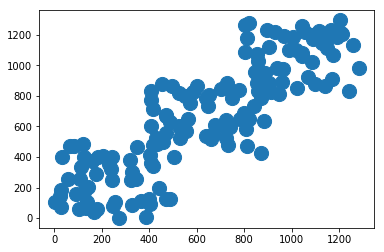

In [6]:
plt.scatter(input_2d_x[:,0], input_2d_x[:,1], s=200)
plt.show()

In [7]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans

from tensorflow.contrib.factorization.python.ops import clustering_ops

### TensorFlow documentation

https://www.tensorflow.org/api_docs/python/tf/contrib/learn/KMeansClustering

__init__(
    num_clusters,
    model_dir=None,
    initial_clusters=RANDOM_INIT,
    distance_metric=SQUARED_EUCLIDEAN_DISTANCE,
    random_seed=0,
    use_mini_batch=True,
    mini_batch_steps_per_iteration=1,
    kmeans_plus_plus_num_retries=2,
    relative_tolerance=None,
    config=None
)

In [11]:
# Add the additional parameters later
k_means_estimator = kmeans.KMeansClustering(num_clusters=3)
# k_means_estimator = kmeans.KMeansClustering(num_clusters=3,
#                                             distance_metric=clustering_ops.COSINE_DISTANCE,
#                                             use_mini_batch=False,
#                                             relative_tolerance=1)

fit = k_means_estimator.fit(input_fn=lambda: input_fn_2d(input_2d_x), steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11864c750>, '_model_dir': '/var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5mDflL', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_environment': 'local', '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5mDflL/model.ckpt.
INFO:tensorflow:loss = 1.9419e+07, step = 1
INFO:tensorflow:global_step/sec: 1235
INFO:tensorflow:loss = 6.15039e+06, step 

### The centroids of the clusters

In [12]:
clusters_2d = k_means_estimator.clusters()
clusters_2d

array([[ 1020.92980957,  1065.08789062],
       [  614.09985352,   657.72631836],
       [  224.33331299,   234.12156677]], dtype=float32)

### Plot the cluster centers along with the points

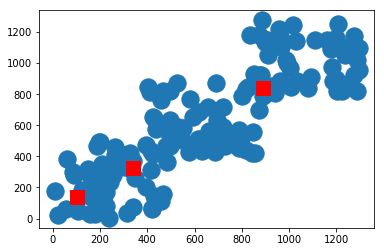

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_2d_x[:,0], input_2d_x[:,1], s=300, marker='o')
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r', s=200, marker='s')

plt.show()

In [13]:
k_means_estimator.get_params()

{'params': {'distance_metric': 'squared_euclidean',
  'kmeans_plus_plus_num_retries': 2,
  'mini_batch_steps_per_iteration': 1,
  'num_clusters': 3,
  'random_seed': 0,
  'relative_tolerance': None,
  'training_initial_clusters': 'random',
  'use_mini_batch': True}}

### Predicts which cluster each point belongs to

*Note that the predict() function expects the input exactly like how we specified the feature vector*

In [14]:
# Try the following values [850, 850], [50, 50], [400, 400]
ex_2d_x = np.array([[400, 400]], dtype=np.float32)

predict = k_means_estimator.predict(input_fn=lambda: input_fn_2d(ex_2d_x), as_iterable=False)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmp5mDflL/model.ckpt-1000


In [15]:
predict

{'all_scores': array([[ 827895.75  ,  112261.5625,   58374.4375]], dtype=float32),
 'cluster_idx': 2}